# Pymaceuticals Inc.
---

### Analysis
1. Capomulin, and Ramicane appear to have a possitive effect on tumor size, but Infubinol and Ceftamin compare vary closely to the Placebo and thus have little to no effect on tumor size, This would require further study for me to say with a degree of certainty that I would be happy with, but it's enough for me to conclude at least in mice, Capomulin and Ramicane generally lead to decreased tumor sizes.
2. Mouse weight appears to be highly corralated with the size of the tumor, Figuring out whether fat mice get larger tumors or Larger tumors lead to mice weighing more would require more study.
3. The difference in number of measurements between the drugs seems to be a potential flaw in the study, The number of measurements seem to be decently biased towards the two seemingly more effective drugs in Capomulin, and Ramicane meanwhile all of the other drugs seem to have about 13% less measurments.

 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_combined = mouse_metadata.merge(study_results, how = 'outer', on='Mouse ID')

# Display the data table for preview
df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [107]:
# Checking the number of mice.
print(f"There are {len(df_combined['Mouse ID'].unique())} mice in the dataframe.")

There are 249 mice in the dataframe.


In [108]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duped_ids = df_combined[df_combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

df_dupe = pd.DataFrame(df_combined.loc[df_combined['Mouse ID'].isin(duped_ids),:])
duped_ids


array(['g989'], dtype=object)

In [109]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = pd.DataFrame(df_combined.loc[df_combined['Mouse ID'].isin(duped_ids) == False,:])
df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# Checking the number of mice in the clean DataFrame.
print(f"There are {len(df_clean['Mouse ID'].unique())} mouse in the dataframe.")

There are 248 mouse in the dataframe.


## Summary Statistics

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [113]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
df_grouped = df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)']
Mean = df_grouped.mean()
Median = df_grouped.median()
VAR = df_grouped.var()
STD = df_grouped.std()
SEM = df_grouped.sem()

summary_dic = {
    'Mean': Mean,
    'Median': Median,
    'VAR': VAR,
    "STD": STD,
    'SEM': SEM
}

df_summary = pd.DataFrame(summary_dic)
df_summary




,Mean,Median,VAR,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [114]:
# Using the aggregation method, produce the same summary statistics in a single line
df_agg_sum = df_grouped.agg(['mean', 'median', 'var', 'std', 'sem'])
df_agg_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [115]:
# I like my charts to be dark theme, don't like the bar color the default 'dark_background' theme offers
# Skip this if you want to keep everything light
# Learned From Ashelyn Allred
plt.rcParams['axes.facecolor'] = 'xkcd:dark gray'
plt.rcParams['figure.facecolor'] = 'xkcd:dark gray'
plt.rcParams['xtick.color'] = 'xkcd:light gray'
plt.rcParams['xtick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['ytick.color'] = 'xkcd:light gray'
plt.rcParams['ytick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['axes.edgecolor'] = 'xkcd:gray'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'xkcd:light gray'
plt.rcParams['text.color'] = 'xkcd:white'

## Bar and Pie Charts

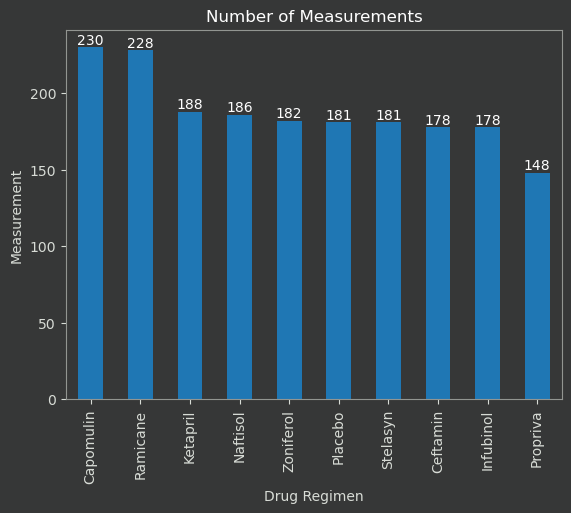

In [116]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_count = df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().sort_values(ascending=False)

regimen_bar = measure_count.plot(kind='bar', title='Number of Measurements')
regimen_bar.set_ylabel('Measurement')
# Refrenced from 
# https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for drug in regimen_bar.containers:
    regimen_bar.bar_label(drug)
plt.show()

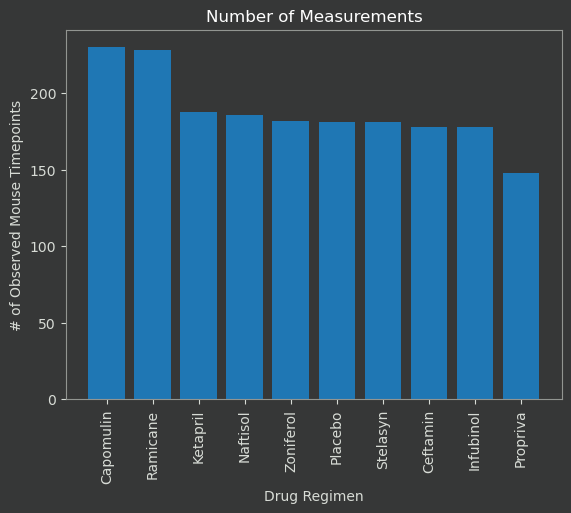

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(measure_count.index, measure_count.values, label='measure_count.values')
plt.title('Number of Measurements')
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

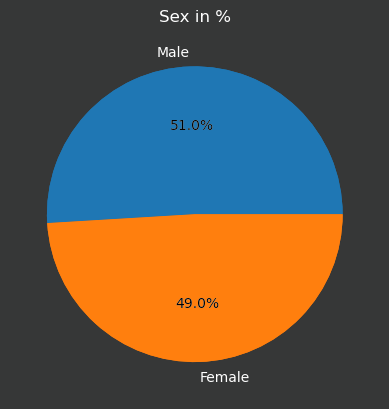

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_values = pd.Series(df_clean['Sex'].value_counts())

pie_values.plot(kind='pie', autopct="%1.1f%%", title='Sex in %')

#Learned from Ashelyn Allred who found this at
# https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart
_, _, autotexts = plt.pie(pie_values.values, autopct="%1.1f%%")
for autotext in autotexts:
    autotext.set_color('black')

plt.ylabel('')
plt.show()

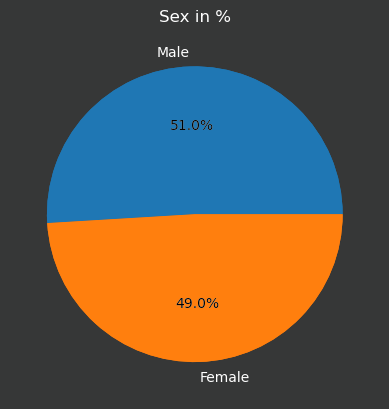

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_values.plot(kind='pie', autopct="%1.1f%%", title='Sex in %')
#Learned from Ashelyn Allred who found this at
# https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart
_, _, autotexts = plt.pie(pie_values.values, autopct="%1.1f%%")
for autotext in autotexts:
    autotext.set_color('black')

plt.ylabel('')
plt.show()

## Quartiles, Outliers and Boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_ages = df_clean.groupby(['Mouse ID'])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_max_time = pd.merge(max_ages, df_clean, on=['Mouse ID', 'Timepoint'], how='inner').reset_index(drop=True)
df_max_time


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [131]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

outl_thresh = 1.5
for tr in range(len(treatments)):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tr_values = df_max_time.loc[df_max_time['Drug Regimen']==treatments[tr],:]['Tumor Volume (mm3)'].reset_index(drop=True)
    # add subset
    tumor_vols.append(tr_values.values)   
    
    # Determine outliers using upper and lower bounds
    lower_bound = tr_values.quantile(0.25)
    upper_bound = tr_values.quantile(0.75)
    iqr = upper_bound - lower_bound
    outliers = pd.concat([tr_values[tr_values < (lower_bound - iqr * outl_thresh)].dropna()\
                          , tr_values[tr_values > (upper_bound + iqr * outl_thresh)].dropna()])


    # print results to console
    print(treatments[tr], "Potential Outliers: \n" + (str(outliers) if len(outliers) > 0 else 'None found') + '\n')

Capomulin Potential Outliers: 
None found

Ramicane Potential Outliers: 
None found

Infubinol Potential Outliers: 
5    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin Potential Outliers: 
None found



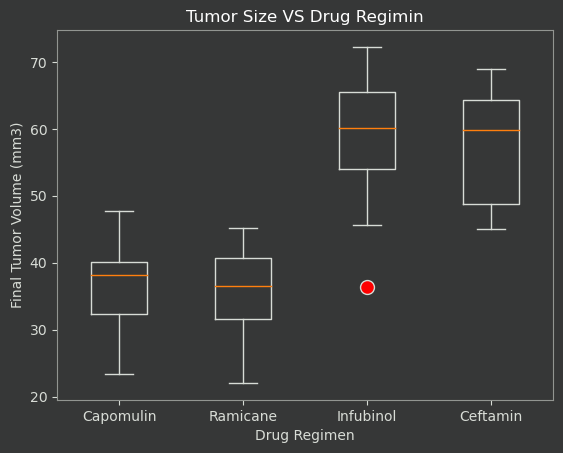

In [132]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
bp = ax1.boxplot(tumor_vols, labels=treatments)
plt.setp(bp['boxes'], color='xkcd:light gray')
plt.setp(bp['whiskers'], color='xkcd:light gray')
plt.setp(bp['caps'], color='xkcd:light gray')
plt.setp(bp['fliers'], markeredgecolor='xkcd:light gray', markerfacecolor='red', marker='o', markersize=10)

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title('Tumor Size VS Drug Regimin')

plt.show()

## Line and Scatter Plots

In [133]:
# Create DF filtered by specified drug
# Change 'drug' if you wish to look at other drugs
drug = "Capomulin"
df_drug = df_combined.loc[df_combined['Drug Regimen'] == drug,['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]

In [134]:
random_mouse = df_drug.sample(1)['Mouse ID'].values[0]
df_rand = df_drug.loc[df_drug['Mouse ID'] == random_mouse, ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
df_rand

,Mouse ID,Timepoint,Tumor Volume (mm3)
361,s710,0,45.000000
362,s710,5,43.180977
363,s710,10,43.688026
364,s710,15,41.845235
365,s710,20,42.629963
366,s710,25,43.060409
367,s710,30,43.571703
368,s710,35,44.160519
369,s710,40,40.171920
370,s710,45,40.728578


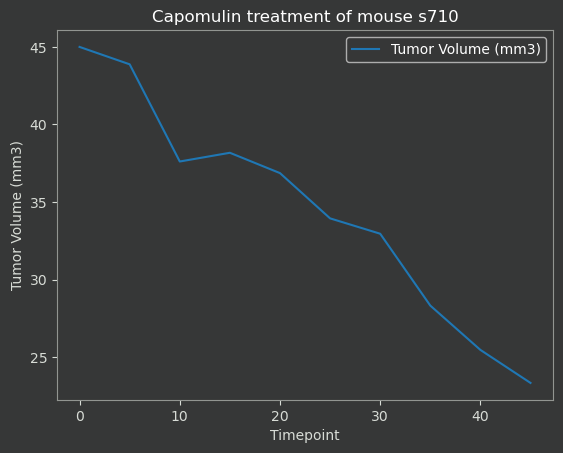

In [135]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
random_MouseID = df_clean.loc[(df_clean['Drug Regimen'] == drug)].iloc[0]['Mouse ID']
random_data = df_clean.loc[(df_clean['Mouse ID'] == random_MouseID)]

random_data.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', ylabel= 'Tumor Volume (mm3)', \
                 title=(f"{drug} treatment of mouse {df_rand['Mouse ID'].unique()[0]}"))
plt.show()

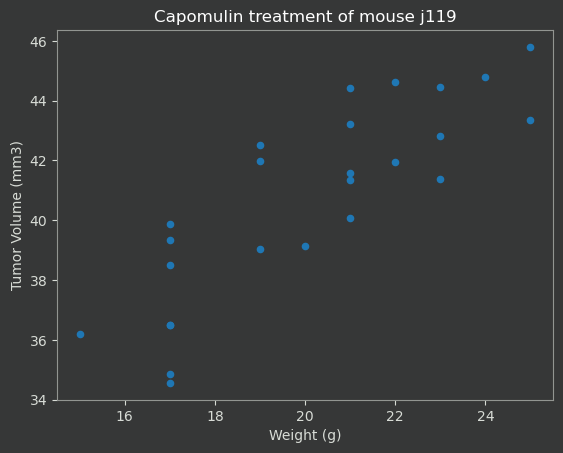

In [128]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_drug = df_clean.loc[(df_clean['Drug Regimen'] == drug)]
avg_volume_data = df_drug.groupby("Mouse ID")[['Weight (g)', 'Tumor Volume (mm3)']].mean()

avg_volume_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)',\
                      title=(f"{drug} treatment of mouse {df_rand['Mouse ID'].unique()[0]}"))

plt.show()

## Correlation and Regression

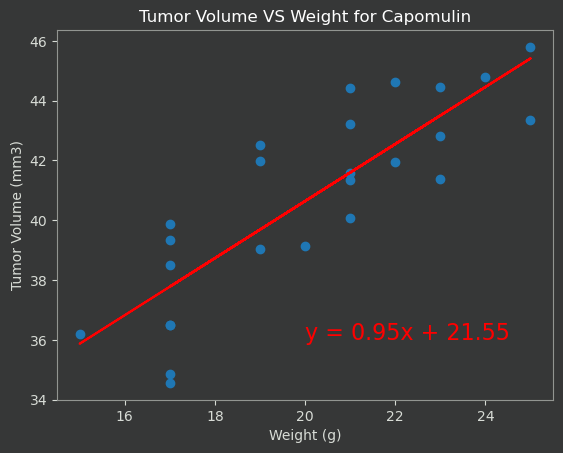

In [129]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire drug regimen

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])
regress_values = avg_volume_data['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#avg_volume_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.scatter(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])
plt.plot(avg_volume_data['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Tumor Volume VS Weight for {drug}")

plt.show()